# Simple Linear Regression Workflow Using R
This notebook was created to show a simple linear regression workflow using data from the 2004 Keith Summerville and Thomas O. Crist paper, "Contrasting Effects of Habitat Quantity and Quality on Moth Communities in Fragmented Landscapes." You can find a copy of the paper <a href="https://onlinelibrary.wiley.com/doi/abs/10.1111/j.0906-7590.2004.03664.x">here</a>.

This workflow assumes a working familiarity with the open-source software R and its companion IDE (Integrated Development Environment), R Studio. The following two tutorials on Youtube serve as a beginner's introduction: <a href="https://www.youtube.com/watch?v=lVKMsaWju8w">Getting Started with R and R Studio</a> and <a href="https://www.youtube.com/watch?v=5YmcEYTSN7k">Introduction to R Studio</a>.

<b>The following are needed for this workflow:</b>
- R and RStudio (our statistical programming platform of choice)
- moths.csv (our data)
- IsolationAndSpecies.R (a working copy of the script used in this notebook)

_________________________________________________________________________

# Workflow Outline

Hypothesis: Is there a significant linear relationship between moth species and degree of habitat isolation?

1. Install and load required R packages.
2. Load the moths data from the .csv file.
3. Log-transform the data.
3. Assess the data for normality.
5. Perform a linear regression.
6. Use regression diagnostics to scrutinize the regression.
6. Statistically summarize the regression and interpret the results.

_________________________________________________________________________

# Glossary

Throughout this exercise, you will notice some words will be colored in red. These are glossary terms which are defined below:

- <b>Continuous variable</b>: A variable with an infinite amount of possible values.
- <b>Cook's distance</b>: Used to estimate the influence of a data point when performing regression analysis. Cook's distance measures the effect of deleting a given observation.
- <b>Dixon's Q Test</b>: Used to identify a single outlier in a dataset. 
- <b>Homoscedasticity</b>: This is an assumption that variance around the regression line is the same for all values of the dependent variable.
- <b>Null hypothesis</b>: This is the hypothesis that there is no significant differences between populations in a study and that all observed differences are the result of chance or error.
- <b>Outlier</b>: An observation that lies outside of the observed pattern of distribution for the other values in a dataset.
- <b>Residuals</b>: These are the vertical differences between the observed values and the values predicted by the model.
- <b>Response variable</b>: Dependent variable.
- <b>Shapiro Test</b>: Statistical test for normality. 

In some sections, relevant reference materials with additional information will be hyperlinked and available for further review. For a general overview of simple linear regression, check out <a href="http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/index.html">this</a> tutorial on correlation and linear regression using R and Brandon Foltz's <a href="https://www.youtube.com/watch?v=ZkjP5RJLQF4">Simple linear regression, the basics</a> on Youtube.
_________________________________________________________________________

Interactive questions will be pre colored in blue. Do your best to think critically about the data and answer these questions as you follow along.
_________________________________________________________________________

### A note on the Jupyter notebook environment
<a href="https://jupyter.org/about">Jupyter notebook</a> is an open source web applications that allows for the sharing of documents that contain live code, equations, text, and pictures. The default language for Jupyter notebooks is Python, but it can be formatted to use R by installing an R kernal. The easiest way to do this is though <a href="https://www.anaconda.com/distribution/">Anaconda Distribution</a>.

## Step 1: Install and load the libraries for some R packages that will be useful as we start to look at and analyze the data.

<i>Note: This particular portion of the code has been formatted differently here to be compliant in Jupyter Notebook. Don't be alarmed if you notice the companion R script .R file provided doesn't match.</i>

In [50]:
install.packages("primer", repos='http://cran.us.r-project.org', dependencies=TRUE)
install.packages("histogram", repos='http://cran.us.r-project.org', dependencies=TRUE)
install.packages("lattice", repos='http://cran.us.r-project.org', dependencies=TRUE)
install.packages("outliers", repos='http://cran.us.r-project.org', dependencies=TRUE)
install.packages("readr", repos='http://cran.us.r-project.org', dependencies=TRUE)


library("primer")
library("histogram")
library("lattice")
library("outliers")
library("repr")

# Change plot size to 4 x 3 in Jupyter notebook
options(repr.plot.width=4, repr.plot.height=3)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## Step 2: Import the moths data from the .csv file.

In [40]:
# This portion of the code reads the .csv file and 
# assigns it to the variable "moths." Note that any 
# header value can be used individually in an analysis simply 
# by calling it after the "moths" variable using a "$" (e.g., moths$spp).

moths <- 
  read.csv("moths.csv",
   header=TRUE, sep=",", na.strings="NA", dec=".", strip.white=TRUE)

# Call the moths variable to view the data table. 

moths

region,site,area,ForstCover,Treediversity,Isolation,spp,lat,long
WAP,ClearCreek,289.0,84.9,5.59,6.89,85,39.593,-82.573
WAP,CraneHollow,180.9,82.2,8.61,6.80,81,39.630,-82.558
WAP,Phinney,93.5,84.3,6.84,6.70,96,39.558,-82.500
WAP,Rockbridge,89.8,38.3,5.09,6.34,47,39.575,-82.500
WAP,Wahkeena,72.8,53.4,2.25,6.38,65,39.635,-82.529
WAP,Klinger,22.6,29.3,7.06,6.03,66,39.587,-82.831
WAP,Fairview,6.9,12.5,3.94,5.43,43,39.525,-82.450
WAP,WindyHills,3.8,38.5,4.97,6.00,41,39.583,-82.533
WAP,RidgeLaurel,1.7,56.2,7.69,6.20,49,39.499,-82.573
NCT,Pater,230.6,37.1,9.01,6.21,90,39.433,-84.742


Remember, this analysis is looking specifically at moth species (spp) and degree of habitat isolation (Isolation). Here, moth spp is our response variable and isolation is our continuous variable. The first thing we want to do is make sure that our response variable is well-behaved. Does it have a normal distribution? 

<i>Reference: <a href="https://www.itl.nist.gov/div898/handbook/pmc/section5/pmc51.htm">What do we mean by "normal" data?</a></i>

## Step 3. Visualize the distribution of the response variable using a histogram.

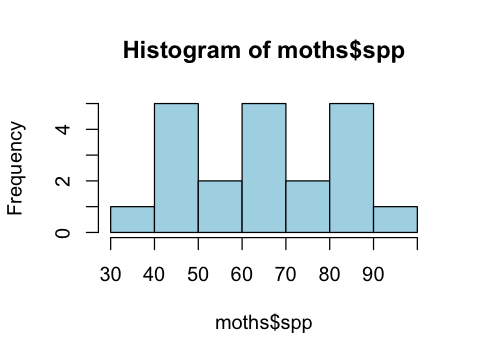

In [55]:
hist(moths$spp, col="lightblue")

What are your thoughts about the distribution of our moth species data from looking at the histogram? Does it look normal?

We can statistically assess our assumptions about normality using the Shapiro Test, which tests the null hypothesis that the sample being tested is normally distributed.

<i>Reference: <a href="https://www.youtube.com/watch?v=ZzeXCKd5a18">Hypothesis testing: Null vs. alternative</a></i>

# Step 4. Run a Shapiro Test on the response variable.

In [4]:
shapiro.test(moths$spp)


	Shapiro-Wilk normality test

data:  moths$spp
W = 0.96008, p-value = 0.5178


## How do we interpret this? 
If the p-value is less than our significance level (p < 0.05), then we DON'T reject the null hypothesis. Our p-value here is 0.5178. What does this tell us about our sample distribution?

# Step 5: Log-transform the data and re-run the Shapiro Test.

When analyzing species-area relationships like Summerville and Crist are investigating in this paper, it is standard to log-transform the data before running linear regression. We're going to go ahead and log transform our data on moth species and isolation here to keep it consistent with the models presented by Summerville and Crist.

<i>Reference: <a href="http://onlinestatbook.com/2/transformations/log.html">Log transformations</a>


	Shapiro-Wilk normality test

data:  log(moths$spp, 10)
W = 0.94994, p-value = 0.3398


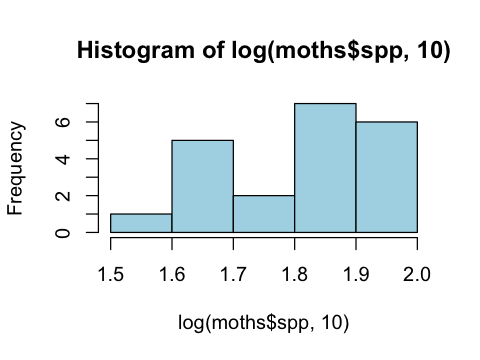

In [43]:
hist(log(moths$spp, 10), col="lightblue")
shapiro.test(log(moths$spp,10))

How did log-transforming the data change its histogram and the results of the initial Shapiro Test?

Now, we follow the same steps with our continuous variable of interest: habitat isolation. We will make things easier by just going ahead and starting with the log-transformed version for this variable.

# Step 6: Make a histogram of the continuous variable.

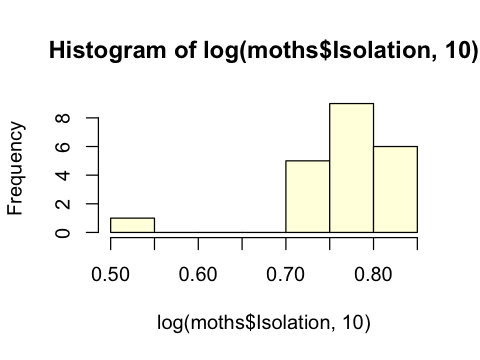

In [46]:
hist(log(moths$Isolation, 10), col="lightyellow")

<font color="blue">What are your thoughts about this histogram? Does it look normally-distributed?</font> 

Just like last time, the Shapiro Test will help to tell us if our suspicions are correct.

# Step 7: Run a Shapiro Test on the continuous variable.

In [9]:
shapiro.test(moths$Isolation)


	Shapiro-Wilk normality test

data:  moths$Isolation
W = 0.85024, p-value = 0.004288


<font color="blue">What do the results of the Shapiro Test indicate regarding the distribution of our data? Does the test reject or support our null hypothesis?</font>

It looks like our isolation data has an <font color="red">outlier</font>. An outlier is an observation that has a different distribution than the main body of data. We can test for outliers that affect the distribution of our data using a <font color="red">Dixon's Q Test</font>.

The Dixon's Q Test allows us to tell whether one (and only one) from a set is an outlier. In this test, the null hypothesis is that there is no significant differences between the values.

# Step 8: Run a Dixon's Q Test

In [13]:
dixon.test(moths$Isolation)


	Dixon test for outliers

data:  moths$Isolation
Q = 0.53687, p-value = 0.01487
alternative hypothesis: lowest value 3.32 is an outlier


Does the Dixon's Q Test support the alternative hypothesis or the null hypothesis?

### Which site had the 3.32 value? Let's pull up our .csv file again.

In [11]:
moths

region,site,area,ForstCover,Treediversity,Isolation,spp,lat,long
WAP,ClearCreek,289.0,84.9,5.59,6.89,85,39.593,-82.573
WAP,CraneHollow,180.9,82.2,8.61,6.80,81,39.630,-82.558
WAP,Phinney,93.5,84.3,6.84,6.70,96,39.558,-82.500
WAP,Rockbridge,89.8,38.3,5.09,6.34,47,39.575,-82.500
WAP,Wahkeena,72.8,53.4,2.25,6.38,65,39.635,-82.529
WAP,Klinger,22.6,29.3,7.06,6.03,66,39.587,-82.831
WAP,Fairview,6.9,12.5,3.94,5.43,43,39.525,-82.450
WAP,WindyHills,3.8,38.5,4.97,6.00,41,39.583,-82.533
WAP,RidgeLaurel,1.7,56.2,7.69,6.20,49,39.499,-82.573
NCT,Pater,230.6,37.1,9.01,6.21,90,39.433,-84.742


The Drake site from the NCT region is an outlier. We can keep this in mind as we move forward. This is something we can look at a little more closely in the next couple steps, once we begin to assess our linear regression model. 

Now that we've assessed both our continuous and response variables for normality, we can perform linear regression.

# Step 9: Perform a linear regression.

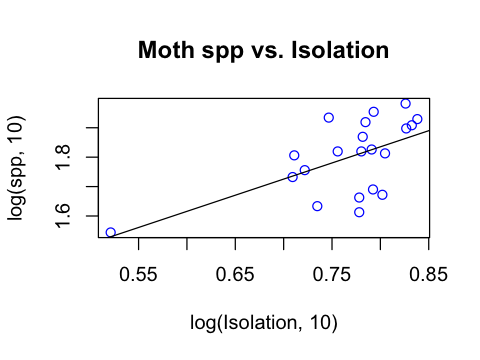

In [53]:
# "lm" stands for linear model; in R, this is how we run a linear regression
# The variables in the model are named and connected using a tilde (~)
# Here, we have simply assigned our linear regression to the variable "model," 
# but you can use whichever naming convention suits you!

plot(log(spp,10) ~ log(Isolation,10), moths, col="blue")
model <- lm(log(spp,10) ~log(Isolation,10), data=moths); title("Moth spp vs. Isolation")
abline(model)

Take a moment to look at this regression. Does there appear to be a relationship? If so, what type?

# Step 10: Regression diagnostics

Regression diagnostics can be used to statistically assess our model and get more details about the relationship we may or may not be observing. This is especially helpful to do in cases like ours, where we noticed that there was outlier that might be influencing our data.

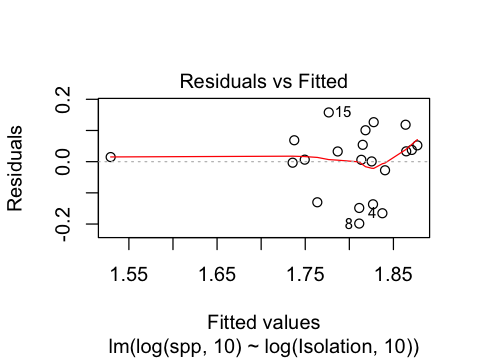

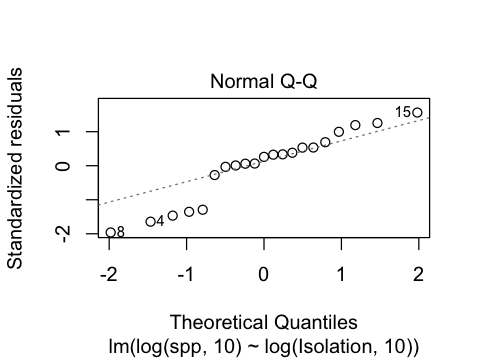

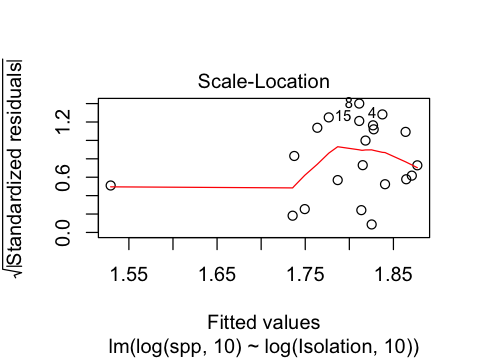

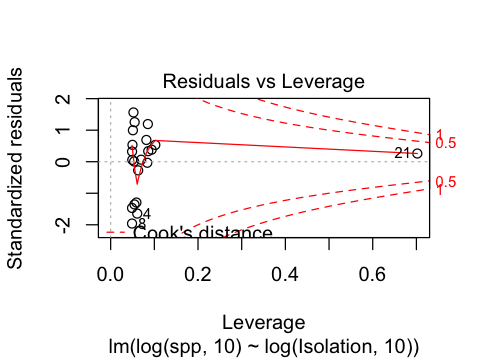

In [48]:
plot(model)

# Graph 1: Residuals vs. predicted values.

This is useful for checking assumptions regarding linearity and homoscedasticity. If the model doesn't meet our assumption about linearity, we would see residuals with large values (either positive or negative). Under ideal circumstances, we would have residuals that are as close to 0 as possible. To assess homoscedasticity, make sure that there is no pattern in the residuals and they are spread more or less equally around the y = 0 line.


# Graph 2: Normal QQ.

This evaluates our assumption that our data are normal. This should be a straight line if the errors are normally-distributed.

# Graph 3: Scale-location. 

This is another check for homoscedasticity. It shows residuals on the y-axis against fitted values on the x-axis. Here, we don't want to see a lot of structure or pattern. This should look like the night sky. 

# Graph 4: Residuals against leverages.

This shows standardized residuals as a function of leverage, along with the Cook's distance for each of the of the values of the response variable. This helps to show the values that have the biggest influence on the parameter estimates. Any observations for which the Cook's distance is close to one or more, or that is much larger than other Cook's distances are influential.

<i>Reference: <a href="http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression7.html">Regression diagnostics</a></i>


Based on these regression diagnostics, do you think the outlier we detected earlier is influentual? <b>Influential outliers are a big concern and shouldn't be ignored.</b> However, not all outliers are influential. This is why it is important to scrutinize the data using tools such as regresion diagnostics. If an outlier is removed from the final model, then a note should be made in the final write up of the results.

# Step 11: Statistically summarize the model.

The final step is to use statistics to sumarize the relationship we are observing in our model.

In [54]:
summary(model)


Call:
lm(formula = log(spp, 10) ~ log(Isolation, 10), data = moths)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19845 -0.02757  0.01473  0.05405  0.15784 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)          0.9577     0.2627   3.645  0.00172 **
log(Isolation, 10)   1.0968     0.3412   3.214  0.00456 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1038 on 19 degrees of freedom
Multiple R-squared:  0.3523,	Adjusted R-squared:  0.3182 
F-statistic: 10.33 on 1 and 19 DF,  p-value: 0.004563


# How to read the results of summary()

## Residuals
These are the vertical differences between the observed values and the values predicted by the model. The smaller the values, the better.

## Coefficients
The coefficient values are the mean change in the response given a one unit change in the predictor. These represent the slope and y-intercept of our line.
- Estimate: This contains two rows. The first row is the y-intercept and the second row is the slope. Here, our models says that there are always 0.96 moth species present and that for every 1 unit of isolation, the number of moth species present increases by 1.1.
- Standard error: This measures the amount that the coefficient estimates vary from the actual value of our response variable (moth species). 
- T value: This is a measure of how many standard deviations our coefficient estimate is away from 0. We want this number to be large - this way, we can reject the null hypothesis (AKA, confidently say there is a relationship between the number of moth species and degree of isolation).
- Pr(>t): This is our probability output. A small p-value indicates that the relationship between moth species and isolation is not due to chance. A p-value < 0.05 for both our intercept and slope, as seen here, means that the relationship is significant. 

## Residual standard error
This tells us the quality of the linear regression fit. That is, the average amount that the response (number of moth species) will deviate from the regression line. 

Given that that there are always 0.96 moth species present and our residual error is 0.1038, our percentage of error that our predictions are off by is 10.81% ((0.1038 divided by 0.96) * 100).

## Multiple and adjusted R-squared
The R-squared (R2) value is a measure of variance that tells us how well our model fits the actual data. It ranges from 0 to 1, where 0 means that the model does not explain the variance in the response variable and 1 means that it does. Adjusted R2 is the preferred measure as it adjusts for the number of variables considered. In our model, our adjusted R2 is 0.3182, or 31.82%. 31.82% of the variance found in moth species can be explained by the degree of isolation. 

## F-statistic
This is an indicator of whether or not there is a relationship between the predictor and response variables. The larger the F-statistic is from 1, the better. However, how large it can be depends on the number of data points. Given a large number of data points, an F-statistic just slightly larger than 1 is enough to reject the null hypothesis. Vice versa if there is a small number of data points. 

Does there appear to be a significant linear relationship between moths and degree of habitat isolation?

### Test your knowledge by splitting up the study regions and running a linear regression for both, with isolation as the continuous variable. Does isolation appear to have more of an effect on one region over the other?

Here's the code for splitting up the sample regions to get you started:

In [51]:
NCTmoths<-subset(moths, region =="NCT")
NCTmoths
WAPmoths<-subset(moths, region=="WAP")
WAPmoths

,region,site,area,ForstCover,Treediversity,Isolation,spp,lat,long
10,NCT,Pater,230.6,37.1,9.01,6.21,90,39.433,-84.742
11,NCT,Brookville,118.2,31.1,7.65,6.09,83,39.504,-85.005
12,NCT,Hueston,88.9,39.1,3.45,6.71,79,39.570,-84.758
13,NCT,Western,68.0,25.7,4.41,6.05,74,39.501,-84.721
14,NCT,McClure,58.7,16.5,3.24,5.70,66,39.456,-84.874
15,NCT,Bittner,38.2,15.0,5.52,5.58,86,39.434,-84.785
16,NCT,Gregg,29.5,10.4,3.70,5.27,57,39.477,-84.720
17,NCT,Jericho,11.1,4.8,7.41,5.14,64,39.539,-84.727
18,NCT,Hermann,9.6,6.3,5.70,5.12,54,39.434,-84.808
19,NCT,Kramer,5.2,38.6,3.27,6.18,67,39.528,-84.716


region,site,area,ForstCover,Treediversity,Isolation,spp,lat,long
WAP,ClearCreek,289.0,84.9,5.59,6.89,85,39.593,-82.573
WAP,CraneHollow,180.9,82.2,8.61,6.80,81,39.630,-82.558
WAP,Phinney,93.5,84.3,6.84,6.70,96,39.558,-82.500
WAP,Rockbridge,89.8,38.3,5.09,6.34,47,39.575,-82.500
WAP,Wahkeena,72.8,53.4,2.25,6.38,65,39.635,-82.529
WAP,Klinger,22.6,29.3,7.06,6.03,66,39.587,-82.831
WAP,Fairview,6.9,12.5,3.94,5.43,43,39.525,-82.450
WAP,WindyHills,3.8,38.5,4.97,6.00,41,39.583,-82.533
WAP,RidgeLaurel,1.7,56.2,7.69,6.20,49,39.499,-82.573
